# CNN - FashionMNIST

### Import Libraries

In [1]:
import time
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, MaxPool2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
K.set_image_data_format("channels_last")

import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras

### Methods Definition

In [2]:
# View 6 images of FashionMNIST in a gray scale
def visualize_fashion_mnist(X_train, y_train, X_test, y_test):
    plt.subplot(321)
    plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
    plt.subplot(322)
    plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
    plt.subplot(323)
    plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
    plt.subplot(324)
    plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
    plt.subplot(325)
    plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
    plt.subplot(326)
    plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
    plt.show()


def create_compile_model_cnn_simple(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def create_compile_model_cnn_plus(num_classes):
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def create_compile_model_cnn_plus_plus(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape = (28, 28, 1), activation = 'relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5)) 
    model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5)) 
    model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_compile_model_cnn_lenet5(num_classes):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPool2D(strides=2))
    model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(MaxPool2D(strides=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def fashion_mnist_using_cnn(mode, X_train, y_train, X_test, y_test):

    # Transform to the format [instances][width][height][pixels]
    # (60000, 28, 28)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    # (60000, 28, 28, 1)

    # Normalize the pixel values from 0-255 to 0-1
    X_train = X_train / 255
    X_test = X_test / 255

    # Transform the label which is an integer into binary categories
    # The value becomes that corresponding to the position, class 5 becomes the list [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]

    # Data Augmentation
    if augmentation == True:
        datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)
        datagen.fit(X_train)
    
    # Define the network topology and compile
    epochs = 15
    if mode == 0:
        model = create_compile_model_cnn_simple(num_classes)
        print_model(model, "model_fashion_mnist_cnn_simples.png")
    elif mode == 1:
        model = create_compile_model_cnn_plus(num_classes)
        print_model(model, "model_fashion_mnist_cnn_plus.png")
    elif mode == 2:
        model = create_compile_model_cnn_plus_plus(num_classes)
        print_model(model, "model_fashion_mnist_cnn_plus_plus.png")
    elif mode == 3:
        model = create_compile_model_cnn_lenet5(num_classes)
        print_model(model, "model_fashion_mnist_cnn_lenet5.png")

    #print(model.summary())
    plotlosses = PlotLossesKeras()
    
    # Training the network
    if augmentation == True:
        history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=100), steps_per_epoch=len(X_train)/100, 
                            epochs=epochs, validation_data=(X_test, y_test), verbose=1, callbacks=[PlotLossesKeras()])
    else:
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=100, verbose=1, callbacks=[PlotLossesKeras()])
    
    #print_history_accuracy(history)
    #print_history_loss(history)

    # Final evaluation with the test cases
    scores = model.evaluate(X_test, y_test, verbose=0)
    #print('Scores: ', scores)
    if mode == 0:
        print("CNN model accuracy FashionMNIST simple: %.2f%%" % (scores[1]*100))
        print("CNN model loss FashionMNIST simple: %.3f" % (scores[0]))
    elif mode == 1:
        print("CNN model accuracy FashionMNIST plus: %.2f%%" % (scores[1]*100))
        print("CNN model loss FashionMNIST plus: %.3f" % (scores[0]))
    elif mode == 2:
        print("CNN model accuracy FashionMNIST plus plus: %.2f%%" % (scores[1]*100))
        print("CNN model loss FashionMNIST plus plus: %.3f" % (scores[0]))
    elif mode == 3:
        print("CNN model accuracy FashionMNIST lenet5: %.2f%%" % (scores[1]*100))
        print("CNN model loss FashionMNIST lenet5: %.3f" % (scores[0]))
        

# Useful to visualize the tipology of the network in pdf or png
def print_model(model, fich):
    from keras.utils import plot_model
    plot_model(model, to_file=fich, show_shapes=True, show_layer_names=True)


# Utils to visualize the history of the learning
def print_history_accuracy(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


def print_history_loss(history):
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### Load Data

In [3]:
((x_train, y_train), (x_test, y_test)) = fashion_mnist.load_data()

### Visualize Data

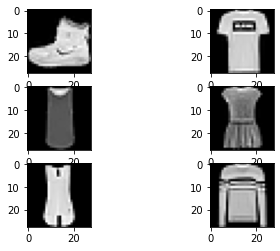

In [4]:
visualize_fashion_mnist(x_train, y_train, x_test, y_test)

### Model Execution

**augmentation: True or False**

**mode: 0 -> simple; 1 -> plus; 2 -> plusplus; 3 -> lenet5;**

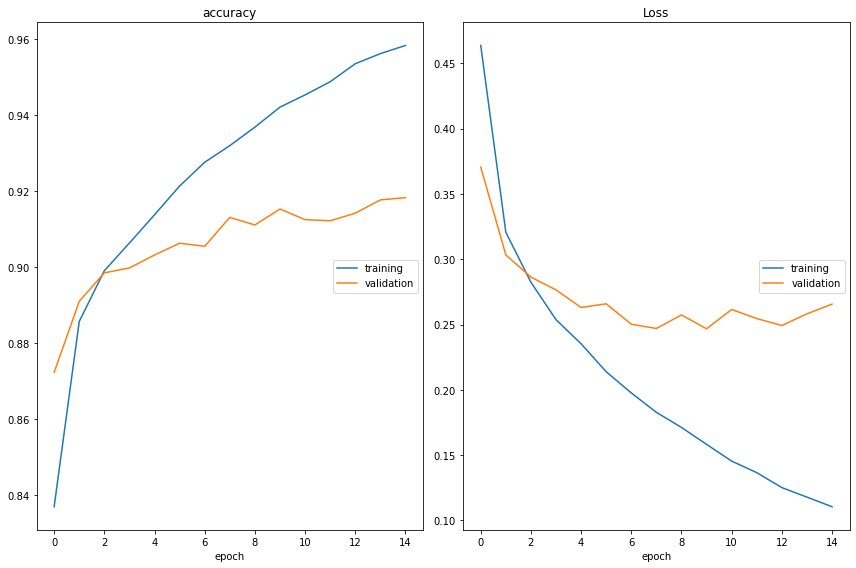

accuracy
	training         	 (min:    0.837, max:    0.958, cur:    0.958)
	validation       	 (min:    0.872, max:    0.918, cur:    0.918)
Loss
	training         	 (min:    0.110, max:    0.464, cur:    0.110)
	validation       	 (min:    0.247, max:    0.370, cur:    0.266)
CNN model accuracy FashionMNIST simple: 91.82%
CNN model loss FashionMNIST simple: 0.266
Processing Time: 439.445 seconds


In [5]:
mode = 0
augmentation = False
start_time = time.time()
fashion_mnist_using_cnn(mode, x_train, y_train, x_test, y_test)
time_taken = time.time() - start_time

print("Processing Time: %.3f seconds" % (time_taken))

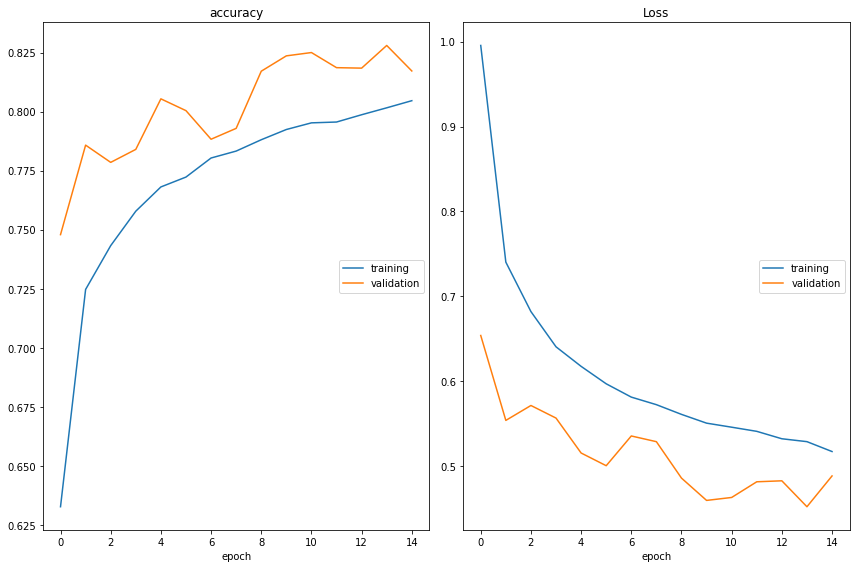

accuracy
	training         	 (min:    0.633, max:    0.805, cur:    0.805)
	validation       	 (min:    0.748, max:    0.828, cur:    0.817)
Loss
	training         	 (min:    0.517, max:    0.995, cur:    0.517)
	validation       	 (min:    0.452, max:    0.654, cur:    0.489)
CNN model accuracy FashionMNIST simple: 81.72%
CNN model loss FashionMNIST simple: 0.489
Processing Time: 646.902 seconds


In [6]:
mode = 0
augmentation = True
start_time = time.time()
fashion_mnist_using_cnn(mode, x_train, y_train, x_test, y_test)
time_taken = time.time() - start_time

print("Processing Time: %.3f seconds" % (time_taken))

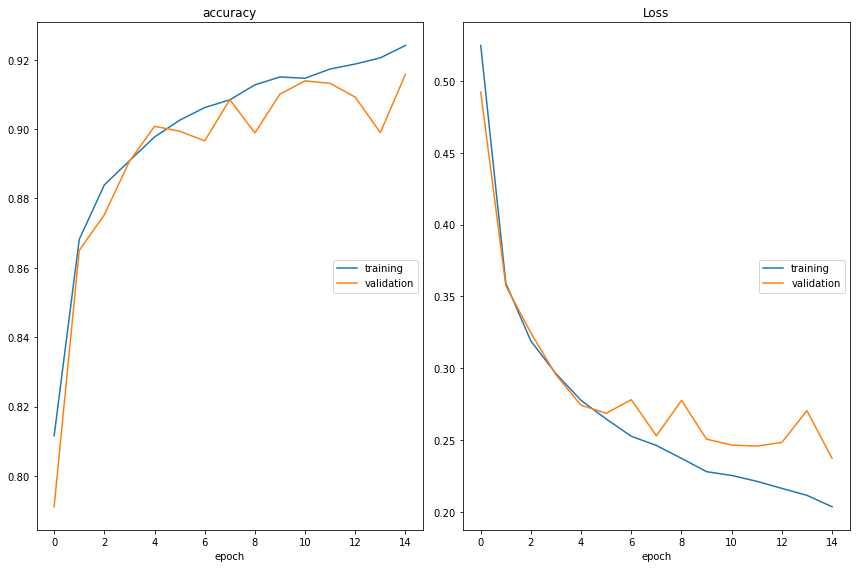

accuracy
	training         	 (min:    0.812, max:    0.924, cur:    0.924)
	validation       	 (min:    0.791, max:    0.916, cur:    0.916)
Loss
	training         	 (min:    0.204, max:    0.525, cur:    0.204)
	validation       	 (min:    0.237, max:    0.492, cur:    0.237)
CNN model accuracy FashionMNIST plus: 91.58%
CNN model loss FashionMNIST plus: 0.237
Processing Time: 730.836 seconds


In [7]:
mode = 1
augmentation = False
start_time = time.time()
fashion_mnist_using_cnn(mode, x_train, y_train, x_test, y_test)
time_taken = time.time() - start_time

print("Processing Time: %.3f seconds" % (time_taken))

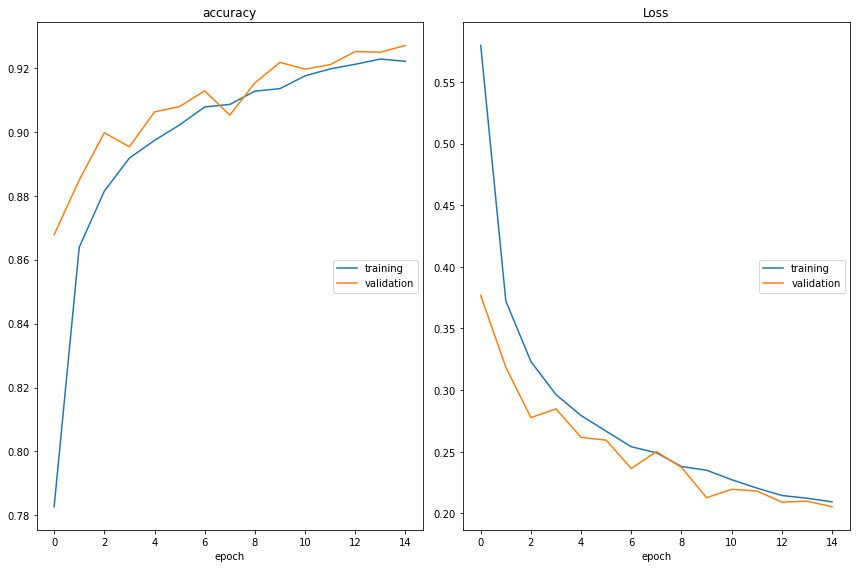

accuracy
	training         	 (min:    0.783, max:    0.923, cur:    0.922)
	validation       	 (min:    0.868, max:    0.927, cur:    0.927)
Loss
	training         	 (min:    0.209, max:    0.580, cur:    0.209)
	validation       	 (min:    0.205, max:    0.377, cur:    0.205)
CNN model accuracy FashionMNIST plus plus: 92.70%
CNN model loss FashionMNIST plus plus: 0.205
Processing Time: 2573.608 seconds


In [8]:
mode = 2
augmentation = False
start_time = time.time()
fashion_mnist_using_cnn(mode, x_train, y_train, x_test, y_test)
time_taken = time.time() - start_time

print("Processing Time: %.3f seconds" % (time_taken))

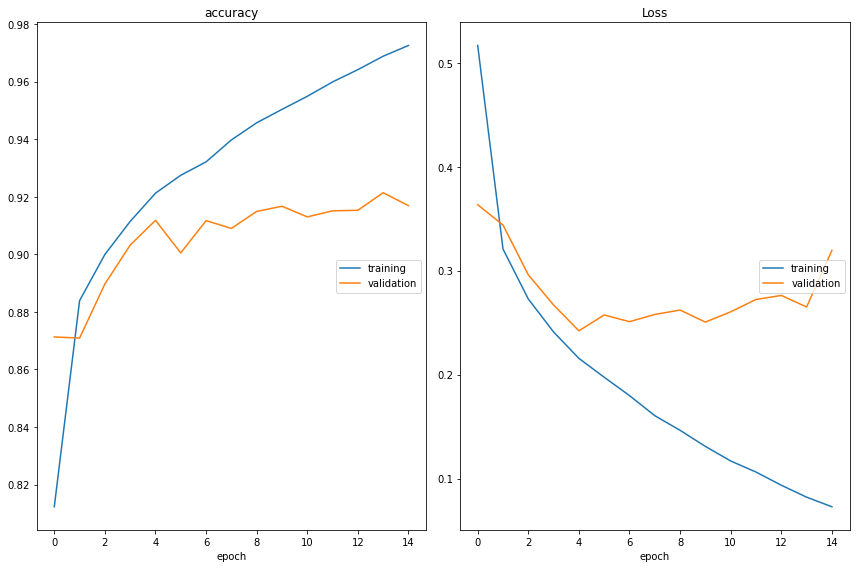

accuracy
	training         	 (min:    0.812, max:    0.973, cur:    0.973)
	validation       	 (min:    0.871, max:    0.921, cur:    0.917)
Loss
	training         	 (min:    0.073, max:    0.517, cur:    0.073)
	validation       	 (min:    0.242, max:    0.363, cur:    0.319)
CNN model accuracy FashionMNIST lenet5: 91.69%
CNN model loss FashionMNIST lenet5: 0.319
Processing Time: 1046.098 seconds


In [9]:
mode = 3
augmentation = False
start_time = time.time()
fashion_mnist_using_cnn(mode, x_train, y_train, x_test, y_test)
time_taken = time.time() - start_time

print("Processing Time: %.3f seconds" % (time_taken))